# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [70]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import warnings to manage all warnings
import warnings

# import colored for text representation
from termcolor import colored

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Understanding the structure of the data

In [71]:
# Suppress all warnings
warnings.filterwarnings("ignore")

# loads the data
origDf = pd.read_csv('foodhub_order.csv')
print('First 5 rows of the Dataframe origDf are: \n')

# returns the first 5 rows
origDf.head()

First 5 rows of the Dataframe origDf are: 



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [72]:
# Display the number of rows and columns in the Dataframe origDf
print('There are ' + '\033[92m' + str(origDf.shape[0]) + '\033[0m' + ' rows and ' + '\033[92m' + str(origDf.shape[1]) + '\033[0m' + ' columns in the Dataframe, origDf')

There are 1898 rows and 9 columns in the Dataframe, origDf


In [73]:
# Display all the column names in origDf
list(origDf.columns)

['order_id',
 'customer_id',
 'restaurant_name',
 'cuisine_type',
 'cost_of_the_order',
 'day_of_the_week',
 'rating',
 'food_preparation_time',
 'delivery_time']

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [74]:
# Data information for all columns in the Dataframe origDf
print('Data information for all columns in origDf: \n')
origDf.info()

Data information for all columns in origDf: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [75]:
# Return the number of null values in each column of Dataframe origDf
print('The number of null values in each column of Dataframe origDf are: \n')
pd.DataFrame(origDf.isnull().sum(), columns = ['Null Values'])

The number of null values in each column of Dataframe origDf are: 



,Null Values
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [76]:
# Return the statistical summary of the Dataframe df for 3 features
print('The statistical summary of the Dataframe origDf for 3 features is: \n')
origDf[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].describe()

The statistical summary of the Dataframe origDf for 3 features is: 



,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000
mean,16.498851,27.371970,24.161749
std,7.483812,4.632481,4.972637
min,4.470000,20.000000,15.000000
25%,12.080000,23.000000,20.000000
50%,14.140000,27.000000,25.000000
75%,22.297500,31.000000,28.000000
max,35.410000,35.000000,33.000000


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [77]:
# Print all unique values of the feature 'rating'
print("The unique values taken by the feature '" + '\033[95m' + "rating" + '\033[0m' + "' in the Dataframe " + '\033[95m' + "origDf" + '\033[0m' + " are: \n\n" + '\033[92m' + 'These -> ' + '\033[0m' + str(list(origDf['rating'].unique())))

The unique values taken by the feature 'rating' in the Dataframe origDf are: 

These -> ['Not given', '5', '3', '4']


In [78]:
# Print the number of orders that were not rated (rated as 'Not given')
print('There are ' + '\033[92m' + str(len(origDf[origDf['rating'] == 'Not given'])) + '\033[0m' + ' orders that are not rated')

There are 736 orders that are not rated


In [79]:
df_R = origDf['rating'].value_counts()
count_R = pd.DataFrame({'Rating' : df_R.index, 'Number of Ratings' : df_R.values})
print('The frequency of all unique ratings are: \n')
count_R

The frequency of all unique ratings are: 



,Rating,Number of Ratings
0,Not given,736
1,5,588
2,4,386
3,3,188


In [80]:
# modDf is a copy of the original DataFrame origDf
modDf = origDf.copy()

# Replace 'Not given' with null in the sixth column
modDf['rating'] = modDf['rating'].replace('Not given', None)

# Data information for all columns in the Dataframe modDf
print('Data information for all columns in modDf: \n')

# Display the columns with null of the modified DataFrame modDf
modDf.info()

Data information for all columns in modDf: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [81]:
# Return the number of null values in each column of Dataframe modDf
print('The number of null values in each column of Dataframe modDf are: \n')
pd.DataFrame(modDf.isnull().sum(), columns = ['Null Values'])

The number of null values in each column of Dataframe modDf are: 



,Null Values
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

# Univariate Analysis For Customer_id: 



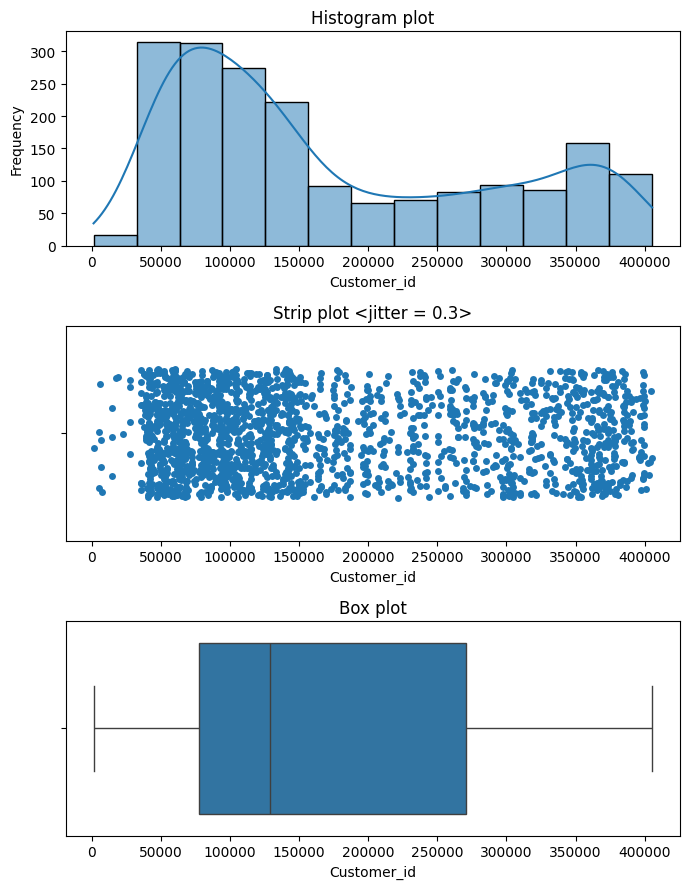

In [82]:
print('# Univariate Analysis For Customer_id: \n')
# Subplots and figure size
fig, axes = plt.subplots(3, 1, figsize = (7, 9))
# Univariate Histogram
sns.histplot(data = origDf, x = 'customer_id', kde = True, ax = axes[0])
axes[0].set_title('Histogram plot')
axes[0].set_xlabel('Customer_id')
axes[0].set_ylabel('Frequency')
# Univariate Strip plot
sns.stripplot(data = origDf, x = 'customer_id', jitter = 0.3, ax = axes[1])
axes[1].set_title('Strip plot <jitter = 0.3>')
axes[1].set_xlabel('Customer_id')
# Univariate Box plot
sns.boxplot(data = origDf, x = 'customer_id', ax = axes[2])
axes[2].set_title('Box plot')
axes[2].set_xlabel('Customer_id')
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()
print('\n')

# Univariate Analysis For Cost Of Order: 



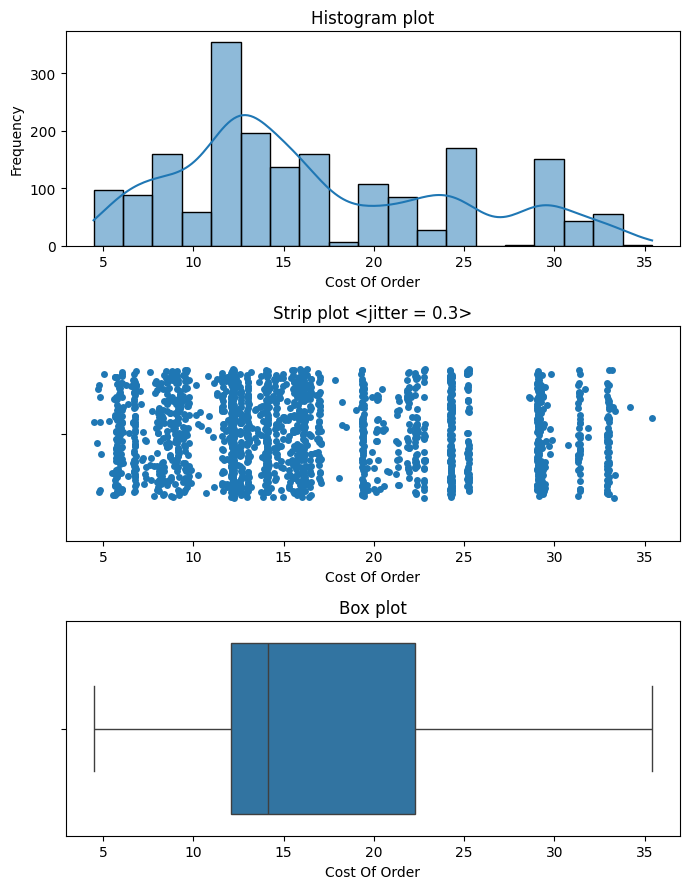



The top 3 frequent cost of orders: 

   Cost of Order  Frequency
0          12.18         86
1          12.13         82
2          12.23         47


In [108]:
print('# Univariate Analysis For Cost Of Order: \n')
# Subplots and figure size
fig, axes = plt.subplots(3, 1, figsize = (7, 9))
# Univariate Histogram
sns.histplot(data = origDf, x = 'cost_of_the_order', kde = True, ax = axes[0])
axes[0].set_title('Histogram plot')
axes[0].set_xlabel('Cost Of Order')
axes[0].set_ylabel('Frequency')
# Univariate Strip plot
sns.stripplot(data = origDf, x = 'cost_of_the_order', jitter = 0.3, ax = axes[1])
axes[1].set_title('Strip plot <jitter = 0.3>')
axes[1].set_xlabel('Cost Of Order')
# Univariate Box plot
sns.boxplot(data = origDf, x = 'cost_of_the_order', ax = axes[2])
axes[2].set_title('Box plot')
axes[2].set_xlabel('Cost Of Order')
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()
print('\n')

# Creates a dataframe 'top3_COO' showing top 3 cost_of_the_order
df_COO = origDf.groupby(['cost_of_the_order'])['order_id'].nunique().sort_values(ascending = False).head(3)
top3_COO = pd.DataFrame({'Cost of Order' : df_COO.index, 'Frequency' : df_COO.values})
# Displays the dataframe 'top3_COO'
print('The top 3 frequent cost of orders: \n')
print(top3_COO)

# Univariate Analysis For Rating: 



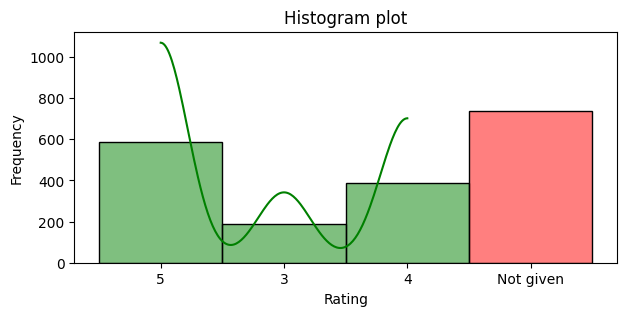

In [84]:
print('# Univariate Analysis For Rating: \n')
# Figure size
plt.figure(figsize = (7, 3))
# Univariate Histogram
sns.histplot(data = origDf[origDf['rating'] != 'Not given'], x = 'rating', kde = True, color = 'green')
sns.histplot(data = origDf[origDf['rating'] == 'Not given'], x = 'rating', kde = True, color = 'red')
plt.title('Histogram plot')
plt.xlabel('Rating')
plt.ylabel('Frequency')
# Show the plots
plt.show()
print('\n')

# Univariate Analysis For Food Preperation Time: 



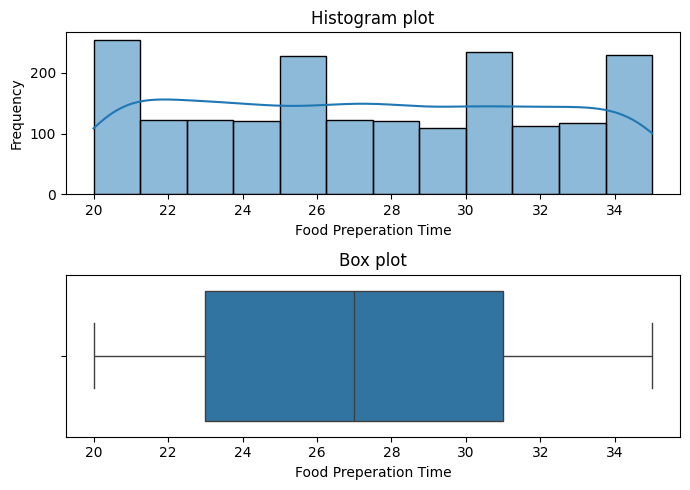

In [85]:
print('# Univariate Analysis For Food Preperation Time: \n')
# Subplots and figure size
fig, axes = plt.subplots(2, 1, figsize = (7, 5))
# Univariate Histogram
sns.histplot(data = origDf, x = 'food_preparation_time', kde = True, ax = axes[0])
axes[0].set_title('Histogram plot')
axes[0].set_xlabel('Food Preperation Time')
axes[0].set_ylabel('Frequency')
# Univariate Box plot
sns.boxplot(data = origDf, x = 'food_preparation_time', ax = axes[1])
axes[1].set_title('Box plot')
axes[1].set_xlabel('Food Preperation Time')
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()
print('\n')

# Univariate Analysis For Delivery Time: 



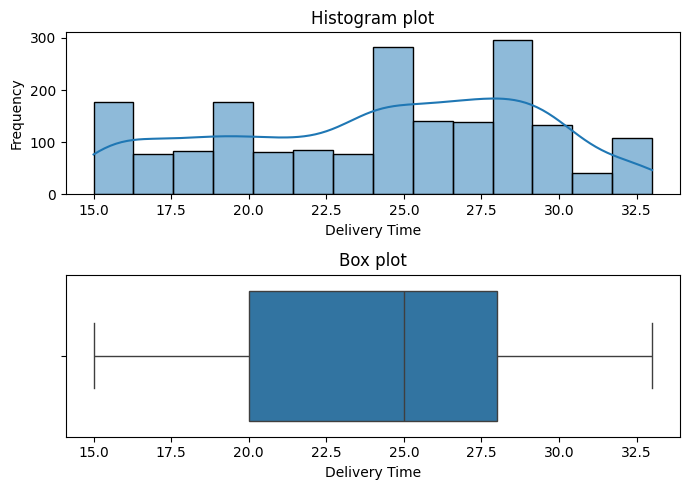

In [86]:
print('# Univariate Analysis For Delivery Time: \n')
# Subplots and figure size
fig, axes = plt.subplots(2, 1, figsize = (7, 5))
# Univariate Histogram
sns.histplot(data = origDf, x = 'delivery_time', kde = True, ax = axes[0])
axes[0].set_title('Histogram plot')
axes[0].set_xlabel('Delivery Time')
axes[0].set_ylabel('Frequency')
# Univariate Box plot
sns.boxplot(data = origDf, x = 'delivery_time', ax = axes[1])
axes[1].set_title('Box plot')
axes[1].set_xlabel('Delivery Time')
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()
print('\n')

# Univariate Analysis For Restaurant Name: 



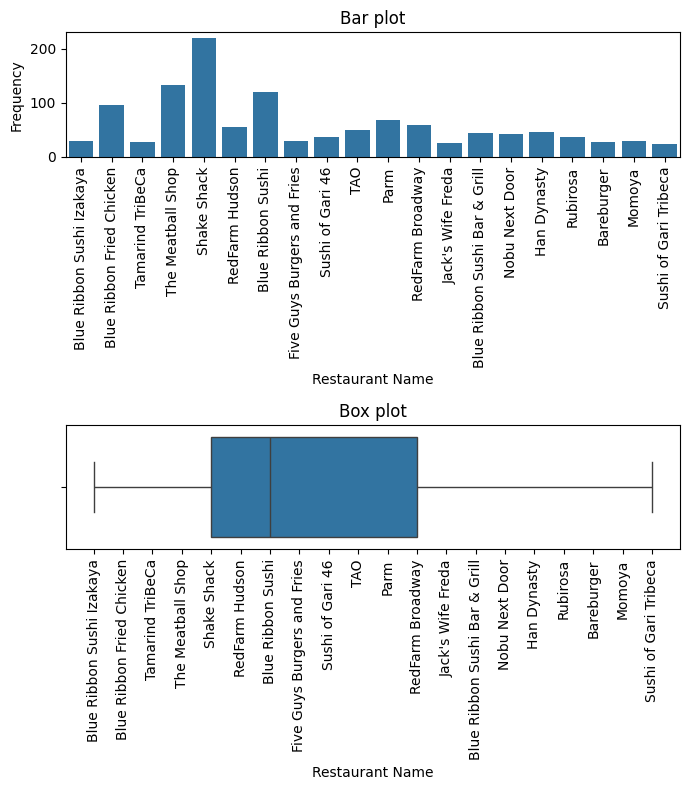

In [87]:
print('# Univariate Analysis For Restaurant Name: \n')
top_values = origDf['restaurant_name'].value_counts().nlargest(20).index
# Filters DataFrame to include only the top 50 values
df_top20 = origDf[origDf['restaurant_name'].isin(top_values)]
# Subplots and figure size
fig, axes = plt.subplots(2, 1, figsize = (7, 8))
# Univariate Histogram
sns.countplot(data = df_top20, x = 'restaurant_name', ax = axes[0])
axes[0].set_title('Bar plot')
axes[0].set_xlabel('Restaurant Name')
axes[0].set_ylabel('Frequency')
# Univariate Box plot
sns.boxplot(data = df_top20, x = 'restaurant_name', ax = axes[1])
axes[1].set_title('Box plot')
axes[1].set_xlabel('Restaurant Name')
# Rotates x-axis tick labels for all subplots
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()
print('\n')

# Univariate Analysis For Cuisine Type: 



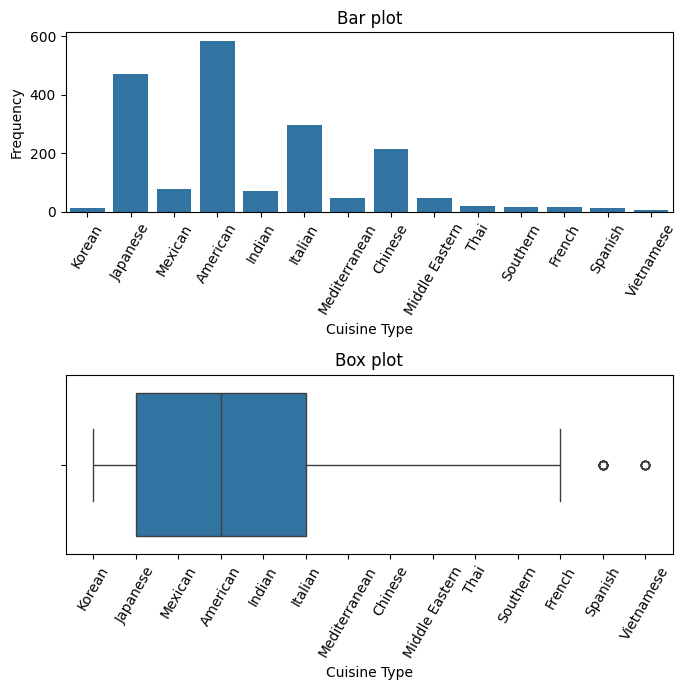

In [88]:
print('# Univariate Analysis For Cuisine Type: \n')
# Subplots and figure size
fig, axes = plt.subplots(2, 1, figsize = (7, 7))
# Univariate Histogram
sns.countplot(data = origDf, x = 'cuisine_type', ax = axes[0])
axes[0].set_title('Bar plot')
axes[0].set_xlabel('Cuisine Type')
axes[0].set_ylabel('Frequency')
# Univariate Box plot
sns.boxplot(data = origDf, x = 'cuisine_type', ax = axes[1])
axes[1].set_title('Box plot')
axes[1].set_xlabel('Cuisine Type')
# Rotate x-axis tick labels for all subplots
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()
print('\n')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [106]:
# Creates a dataframe 'top5_RN' showing top 5 restaurant names by number of orders
df_RN = origDf['restaurant_name'].value_counts().sort_values(ascending = False).head(5)
top5_RN = pd.DataFrame({'Restaurant Name' : df_RN.index, 'Frequency' : df_RN.values})

# Displays the dataframe 'top5_RN'
print('The top 5 restaurants by most number of orders: \n')
top5_RN

The top 5 restaurants by most number of orders: 



,Restaurant Name,Frequency
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [105]:
# Creates a dataframe 'top3_PC' showing top 3 popular cuisines
df_PC = origDf[origDf['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().sort_values(ascending = False).head(3)
top3_PC = pd.DataFrame({'Cuisine' : df_PC.index, 'Frequency' : df_PC.values})

# Displays the dataframe 'top3_PC'
print('The top 3 popular cuisines: \n')
top3_PC

The top 3 popular cuisines: 



,Cuisine,Frequency
0,American,415
1,Japanese,335
2,Italian,207


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [92]:
print('\033[92m' + str(round((origDf[origDf['cost_of_the_order'] > 20]['order_id'].nunique() / origDf['order_id'].nunique()) * 100, 2)) + '%' + '\033[0m' + ' of orders cost more than $20 per order')

29.24% of orders cost more than $20 per order


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [107]:
print('The average of delivery time is ' + '\033[92m' + str(round(origDf['delivery_time'].mean(), 2)))

The average of delivery time is 24.16


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [109]:
# Gets the top 3 customer IDs and their corresponding number of orders
top_customers = origDf['customer_id'].value_counts().sort_values(ascending = False).head(3)

# Creates a DataFrame with 'Customer_id' and their corresponding 'number_of_orders' columns
top_customers_df = pd.DataFrame({'Customer_id': top_customers.index, 'Number_of_Orders': top_customers.values})

# Displayes the DataFrame 'top_customers_df'
top_customers_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Customer_id,Number_of_Orders
0,52832,13
1,47440,10
2,83287,9


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


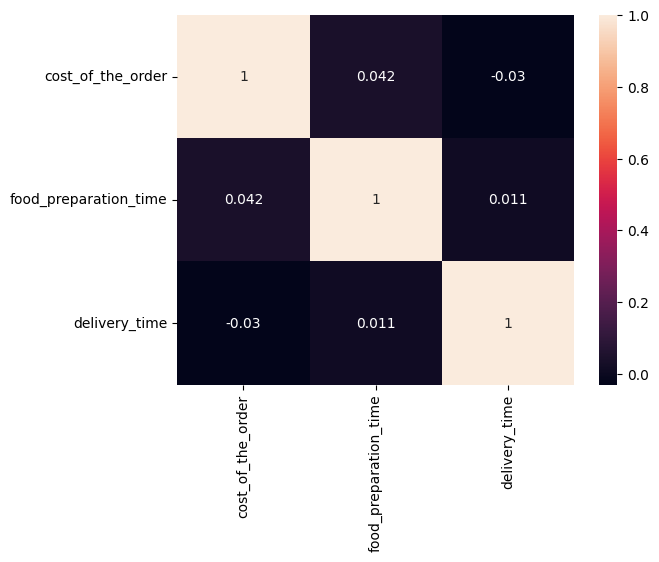

In [95]:
sns.heatmap(modDf[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']].corr(), annot = True)
plt.show()

In [96]:
customerOrderCount = origDf.groupby(['customer_id'])['order_id'].nunique().reset_index().rename(columns = {'order_id' : 'order_cnt'})
modDf['rating'] = pd.to_numeric(modDf['rating'], errors = 'coerce')
aggDf = ((((customerOrderCount.merge(modDf.groupby('customer_id')['rating'].mean(), how = 'inner', on = 'customer_id')).merge(origDf.groupby('customer_id')['cost_of_the_order'].sum(), how = 'inner', on = 'customer_id')).merge(origDf.groupby('customer_id')['cost_of_the_order'].mean(), how = 'inner', on = 'customer_id')).merge(origDf.groupby('customer_id')['food_preparation_time'].mean(), how = 'inner', on = 'customer_id')).merge(origDf.groupby('customer_id')['delivery_time'].mean(), how = 'inner', on = 'customer_id')
orderRating = aggDf.rename(columns = {'rating' : 'avg_rating', 'cost_of_the_order_x' : 'total_cost', 'cost_of_the_order_y' : 'avg_cost', 'food_preparation_time' : 'avg_food_prep_time', 'delivery_time' : 'avg_delivery_time'})
orderRating.head()

,customer_id,order_cnt,avg_rating,total_cost,avg_cost,avg_food_prep_time,avg_delivery_time
0,1311,1,NaN,16.10,16.100,22.0,26.0
1,5139,1,5.0,22.26,22.260,28.0,22.0
2,5444,1,3.0,20.18,20.180,22.0,29.0
3,5693,1,NaN,8.30,8.300,29.0,32.0
4,6987,2,4.0,42.01,21.005,27.5,31.0


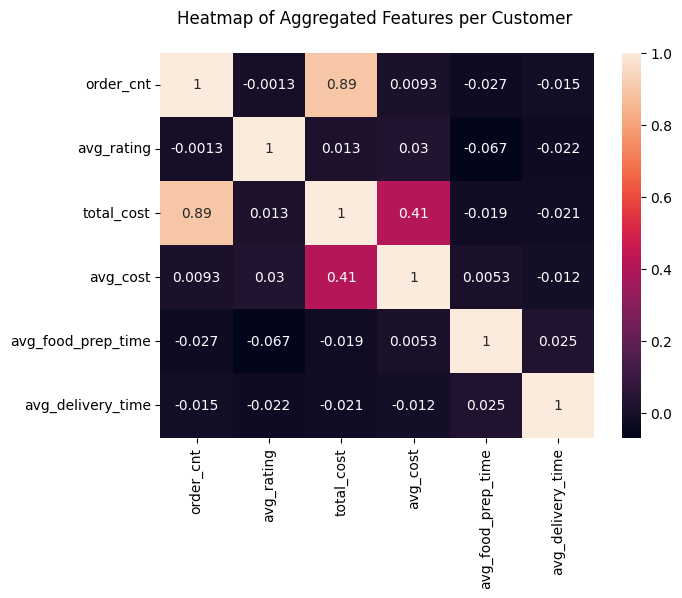

In [110]:
plt.figure(figsize = (7, 5))
sns.heatmap(orderRating[['order_cnt', 'avg_rating', 'total_cost', 'avg_cost', 'avg_food_prep_time', 'avg_delivery_time']].corr(), annot = True)
plt.title('Heatmap of Aggregated Features per Customer \n')
plt.show()
print('\n')

<ipython-input-111-c30ee0f243f5>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = orderRating, x = 'order_cnt', y = 'avg_rating', ci = False, ax = axes[0])


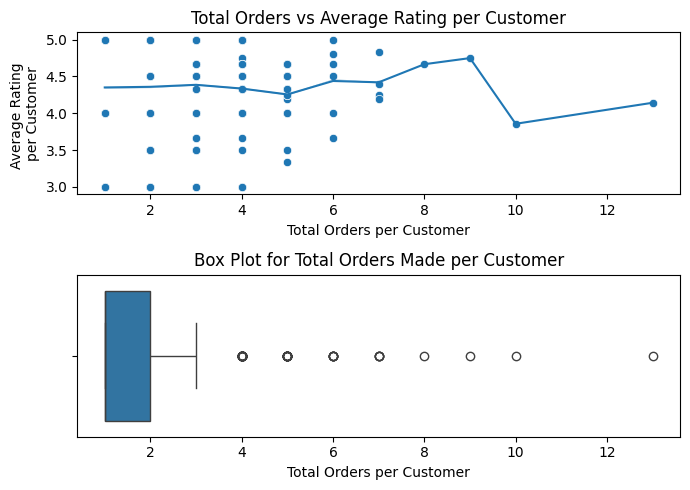

In [111]:
fig, axes = plt.subplots(2, 1, figsize = (7, 5))
# Total Orders vs Average Rating per Customer
sns.scatterplot(data = orderRating, x = 'order_cnt', y = 'avg_rating', ax = axes[0])
sns.lineplot(data = orderRating, x = 'order_cnt', y = 'avg_rating', ci = False, ax = axes[0])
axes[0].set_xlabel('Total Orders per Customer')
axes[0].set_ylabel('Average Rating \nper Customer')
axes[0].set_title('Total Orders vs Average Rating per Customer')
# Box Plot for Total Orders Made per Customer
sns.boxplot(data = orderRating, x = 'order_cnt', ax = axes[1])
axes[1].set_xlabel('Total Orders per Customer')
axes[1].set_title('Box Plot for Total Orders Made per Customer')
plt.tight_layout()
plt.show()
print('\n')

<ipython-input-112-0a91dd0c2e60>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = orderRating, x = 'avg_rating', y = 'avg_cost', ci = False, ax = axes[0])


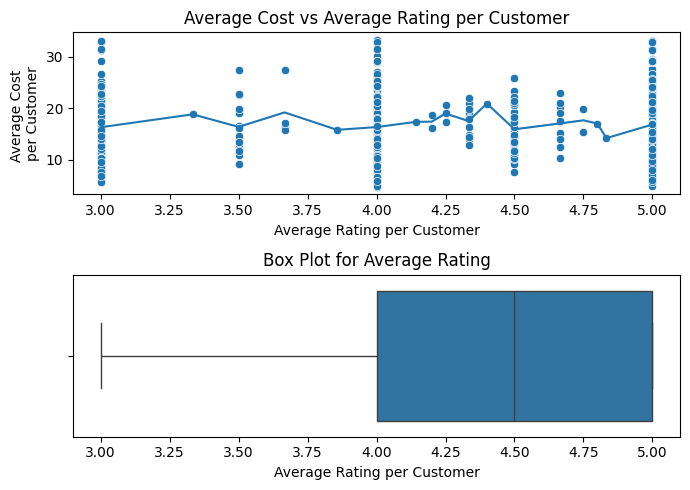

In [112]:
fig, axes = plt.subplots(2, 1, figsize = (7, 5))
# Total Orders vs Average Rating per Customer
sns.scatterplot(data = orderRating, x = 'avg_rating', y = 'avg_cost', ax = axes[0])
sns.lineplot(data = orderRating, x = 'avg_rating', y = 'avg_cost', ci = False, ax = axes[0])
axes[0].set_xlabel('Average Rating per Customer')
axes[0].set_ylabel('Average Cost \nper Customer')
axes[0].set_title('Average Cost vs Average Rating per Customer')
# Box Plot for Total Orders Made per Customer
sns.boxplot(data = orderRating, x = 'avg_rating', ax = axes[1])
axes[1].set_xlabel('Average Rating per Customer')
axes[1].set_title('Box Plot for Average Rating')
plt.tight_layout()
plt.show()
print('\n')

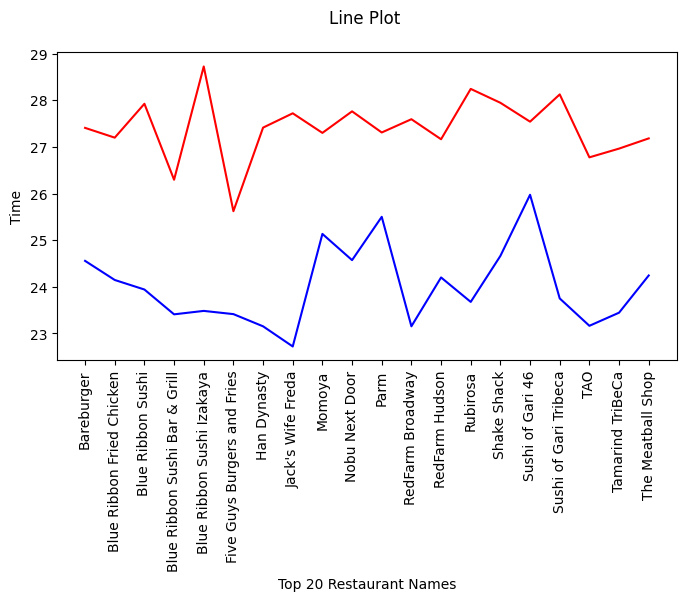

In [151]:
tempDf1 = origDf[origDf['restaurant_name'].isin(df_top20['restaurant_name'])][['delivery_time', 'restaurant_name']]
tempDf2 = tempDf1.groupby(['restaurant_name'])['delivery_time'].mean().reset_index().rename(columns = {'delivery_time' : 'avg_delivery_time'})

tempDf5 = origDf[origDf['restaurant_name'].isin(df_top20['restaurant_name'])][['food_preparation_time', 'restaurant_name']]
tempDf6 = tempDf5.groupby(['restaurant_name'])['food_preparation_time'].mean().reset_index().rename(columns = {'food_preparation_time' : 'avg_food_prep_time'})

plt.figure(figsize = (8,4))

sns.lineplot(data = tempDf2, x = 'restaurant_name', y = 'avg_delivery_time', color = 'blue')
plt.xticks(rotation = 90)
plt.ylabel('Time')
plt.xlabel('Top 20 Restaurant Names')
print('\n')

sns.lineplot(data = tempDf6, x = 'restaurant_name', y = 'avg_food_prep_time', color = 'red')
plt.xticks(rotation = 90)
plt.ylabel('Time')

plt.title('Line Plot \n')
plt.show
print('\n')

<ipython-input-153-7ad4d2f024dd>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = orderRating, x = 'avg_rating', y = 'avg_delivery_time', color = 'blue', ci = False)


<ipython-input-153-7ad4d2f024dd>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = orderRating, x = 'avg_rating', y = 'avg_food_prep_time', color = 'red', ci = False)


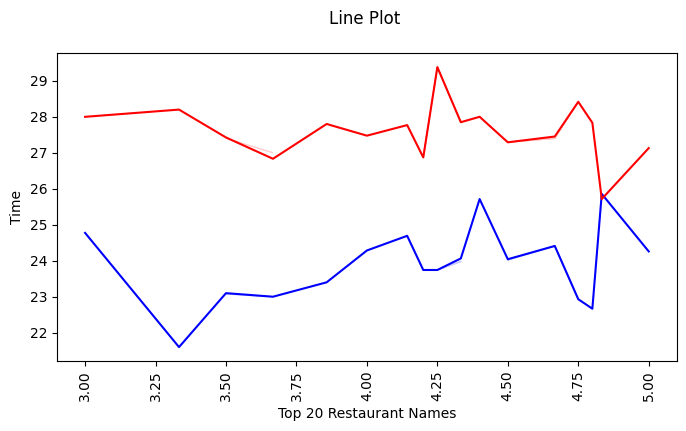

In [153]:
plt.figure(figsize = (8,4))

sns.lineplot(data = orderRating, x = 'avg_rating', y = 'avg_delivery_time', color = 'blue', ci = False)
plt.xticks(rotation = 90)
plt.ylabel('Time')
plt.xlabel('Top 20 Restaurant Names')
print('\n')

sns.lineplot(data = orderRating, x = 'avg_rating', y = 'avg_food_prep_time', color = 'red', ci = False)
plt.xticks(rotation = 90)
plt.ylabel('Time')

plt.title('Line Plot \n')
plt.show
print('\n')

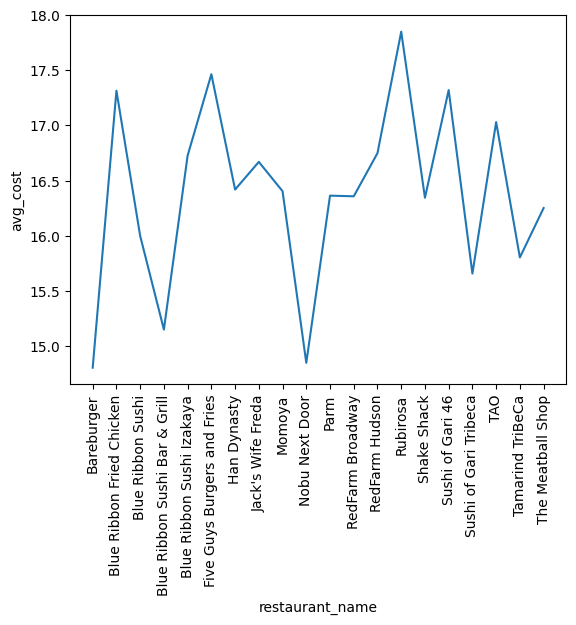

In [113]:
tempDf3 = origDf[origDf['restaurant_name'].isin(df_top20['restaurant_name'])][['cost_of_the_order', 'restaurant_name']]
tempDf4 = tempDf3.groupby(['restaurant_name'])['cost_of_the_order'].mean().reset_index().rename(columns = {'cost_of_the_order' : 'avg_cost'})

sns.lineplot(data = tempDf4, x = 'restaurant_name', y = 'avg_cost')
plt.xticks(rotation = 90)
plt.show
print('\n')

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [99]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [100]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [101]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [102]:
# Write the code here

# Reset warning settings to default (optional)
warnings.resetwarnings()

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---